# Calculadora de vigas - Andrés Felipe Cuscagua López

- Profesor: ----
- Materia: ---

### Paquetes utilizados

In [2]:
import numpy as np                 # Paquete para operar matrices usado en python
import alphas3Momentos as tablas   # Modulo que tiene las formulas de los 3 momentos para los alphas (desarrollado)
import Viga                        # Modulo para crear la estructura de datos "Viga" (desarrollado)
from diagramas import graficador   # Modulo para graficar los momentos de la viga (desarrollado)

### Se crea una viga y se pasa la información de cada tramo.

In [ ]:
Mi_viga = Viga.Viga()
Mi_viga.definir_tramos()

In [ ]:
Tramos = Mi_viga.tramos
Tramos

### Se calculan los momentos

In [ ]:
momentos = Viga.calcular_momentos(Tramos)
momentos

### Se calculan las reacciones

In [ ]:
Rs = Viga.obtener_Rs(Tramos, momentos)
Rs

### Se definen las condiciones en cada tramo de la viga para graficar los momentos

In [3]:
Graficas = graficador()

Escriba el tipo de la carga/reaccion 1: puntual
Escriba la magnitud de la carga/reaccion: 1
Escriba la longitud de la carga/reaccion: 0
Hay mas trozos?: si


Escriba el tipo de la carga/reaccion 2: distribuida
Escriba la magnitud de la carga/reaccion: 2
Escriba la longitud de la carga/reaccion: 2
Hay mas trozos?: si


Escriba el tipo de la carga/reaccion 3: reaccion
Escriba la magnitud de la carga/reaccion: 8.361
Escriba la longitud de la carga/reaccion: 0
Hay mas trozos?: si


Escriba el tipo de la carga/reaccion 4: nada
Escriba la magnitud de la carga/reaccion: 0
Escriba la longitud de la carga/reaccion: 3
Hay mas trozos?: si


Escriba el tipo de la carga/reaccion 5: puntual
Escriba la magnitud de la carga/reaccion: 3
Escriba la longitud de la carga/reaccion: 0
Hay mas trozos?: si


Escriba el tipo de la carga/reaccion 6: distribuida
Escriba la magnitud de la carga/reaccion: 2
Escriba la longitud de la carga/reaccion: 3
Hay mas trozos?: si


Escriba el tipo de la carga/reaccion 7: re

### Gráfica de Momentos

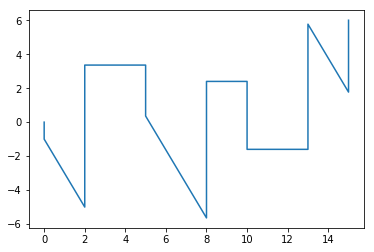

In [5]:
Graficas.grafica_1()